# NLP with word2vec
In this notebook, I do some text analytics with word2vec. The dataset is again the with the articles from watson.ch. In the first part, I do some analysis on the whole dataset, including some vector-calculus. Finally I try to figure out whether the journalists have a different understanding in how some words are used. 

First I need to 
To install gensim, from the command line, you can run:

``conda install -c conda-forge gensim``

In [19]:
import pandas as pd
import gensim
#import Python libaries needed for training embbeded vectors 
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec
import time # for checking how long the training process takes
import re
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
% matplotlib inline

import the cleaned dataset 

In [ ]:
articles = pd.read_csv("articles.csv", usecols = ["author","article"])
articles.head(5)

the next objective is to prepare the data so that the model can be trained. Luckily, most of the cleaning is already done. What is left is to create a big list of all the articles.

In [ ]:
texts=articles["article"]
sentences =  [gensim.utils.simple_preprocess(_) for _ in texts]

In [ ]:
sg_ = 1 # the training algorithm. If sg=0, CBOW is used. Otherwise (sg=1), skip-gram is employed.
alg = 'CBOW' if sg_ == 0 else 'sg'
size_ = 10 #  the dimensionality of the feature vectors
window_ = 2 # the context size or the maximum distance between the current and predicted word


model = Word2Vec(sentences, size=1000, window=5, min_count=1, workers=8)
words = list(model.wv.vocab.keys())
print(f"The number of words: {len(words)}")
print(f"The first 10 words in the vocabularies: {words[0:10]}")


So let's see what the model calculated. Hm... What are the most similar words for "geld" (money)

In [ ]:
# model['ich']
model.wv.most_similar('geld')

the result seem way too high. so, likely there is something wrong. Yes, and the first thing is that in the data, the sentences were not indicated. So it took each article as "sentence". So, it might be necessary to do the whole data-cleaning process again. However, before doing that, I want to test how the algorithm reacts to the uncleaned data.

In [3]:
articles_raw = pd.read_csv("watson_schweiz.csv",sep = ";",usecols = ["author","article"])
articles_raw.head(5)

,author,article
0,no_author,"['Naaa, wie kommt ihr so zur Uni? Mit dem Fahr..."
1,no_author,['\r\n\t\tMit deiner Anmeldung erklärst du dic...
2,no_author,['\nDer Ausbau des öffentlichen Verkehrs würde...
3,no_author,['\nDie gefeierte Online-Bank N26 verspielt ge...
4,no_author,['\nDer gesetzliche Schutz des Wolfes wird der...


Encode again the jouurnalists

In [4]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
articles_raw["author"] = labelencoder.fit_transform(articles_raw["author"])

So what I didn't do before was turning each article into a list...

In [5]:
articles_raw["article"] = articles_raw["article"].apply(lambda x: re.split("\.|\!|\\?",x))

See if it worked

In [6]:
for i, n in enumerate(articles_raw.iloc[0,1]):
    print(n)
    if i == 10:
        break

['Naaa, wie kommt ihr so zur Uni
 Mit dem Fahrrad, der Bahn oder dem Auto
 Oder vielleicht doch mit eurer eigenen kleinen Propellermaschine
 Dem Privat-Jet
 Oder morgen mal mit dem Kreuzfahrtdampfer
 ', 'Immerhin eines dieser scheinbar absurden Fortbewegungsmittel für den alltäglichen Gebrauch nutzt ein Professor der HTW Chur, um ein bisschen den Frühlingsanfang zu geniessen
 Das postete die Hochschule auf ihrem Instagram-Account
 ', ' Wie kommt ihr zur Arbeit/zum Unterricht
 Mit dem Zug, dem Auto oder ebenfalls mit dem Flugzeug, so wie unser Studienleiter
🛩 HTW Chur Tourismus-Studienleiter Thorsten Merkle lebt im Wallis und pendelt mehrmals in der Woche zwischen Wohn- und Arbeitsort quer durch die Schweiz
 Ganz der Touristiker macht er das bei gutem Wetter manchmal mit dem Flugzeug, so letzte Woche zum Frühlingsanfang


Obiously, nothing is cleaned. But I'm curious to see what happens... 
Next step would be to append all articles to one big list. Then it should be ready to train.

In [7]:
texts = []
for i in articles_raw["article"]: # loop in loop, since each sentence needs to be seperately added
    for s in i:
        texts.append(s)

Preprocess

In [8]:
sentences =  [gensim.utils.simple_preprocess(_) for _ in texts] # do some preprocessing

In [10]:
sg_ = 1 # the training algorithm. If sg=0, CBOW is used. Otherwise (sg=1), skip-gram is employed.
alg = 'CBOW' if sg_ == 0 else 'sg'
size_ = 10 #  the dimensionality of the feature vectors
window_ = 2 # the context size or the maximum distance between the current and predicted word


model_watson = Word2Vec(sentences, size=1000, window=5, min_count=1, workers=8)
words = list(model_watson.wv.vocab.keys())
print(f"The number of words: {len(words)}")
print(f"The first 10 words in the vocabularies: {words[0:10]}")

C:\Users\gwehrm\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


The number of words: 128545
The first 10 words in the vocabularies: ['naaa', 'wie', 'kommt', 'ihr', 'so', 'zur', 'uni', 'mit', 'dem', 'fahrrad']


save the model

In [12]:
model_watson.save("word2vec.model_watson")

In [13]:
model_watson.wv.most_similar('mann')

[('frau', 0.7477926015853882),
 ('jährige', 0.7419450283050537),
 ('beschuldigte', 0.732964277267456),
 ('sohn', 0.7066613435745239),
 ('mutter', 0.6972665786743164),
 ('polizist', 0.6956841945648193),
 ('täter', 0.6771899461746216),
 ('ehemann', 0.67058265209198),
 ('familie', 0.6663516759872437),
 ('vater', 0.6413532495498657)]

In [14]:
model_watson.wv.most_similar('schweiz')

[('branche', 0.6557095646858215),
 ('romandie', 0.635584831237793),
 ('westschweiz', 0.6094341278076172),
 ('europa', 0.6094118356704712),
 ('welt', 0.6061170697212219),
 ('hauptängste', 0.6002870798110962),
 ('deutschschweiz', 0.5980672240257263),
 ('regel', 0.5913320183753967),
 ('nschweiz', 0.5864835381507874),
 ('schweizer', 0.5593750476837158)]

Seems to work  pretty well, awesome! I found a nice post about "Visualizing Word2Vec Word Embeddings using t-SNE". 
https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
Let's see how I can follow the example.

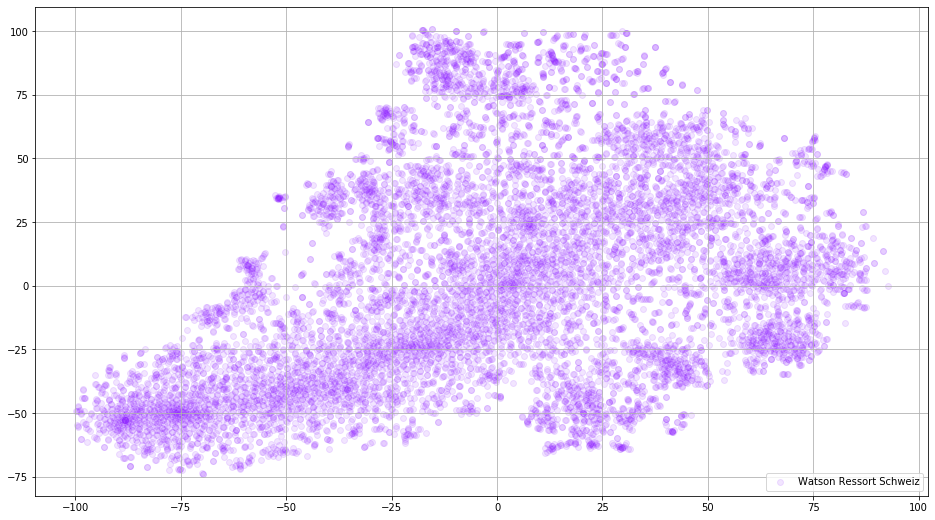

In [23]:
words_ak = []
embeddings_ak = []
for i, word in enumerate(list(model_watson.wv.vocab)):
    embeddings_ak.append(model_watson.wv[word])
    words_ak.append(word)
    if i ==10000:
        break
    
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Watson Ressort Schweiz', embeddings_ak_2d, a=0.1)

This visualisation doesn't contain that much "valuable" information. The second part of this analysis will be more interesting though. First, let me outline the idea:

I want to compare whether authors use some words differently than others. When using the example above (which is not really good, but anyways), some journalist connotate "schweiz" with the geographics, whereas other see more emotional stuff conotated with it, like "home". 

This is the basic idea. I want to test, whether there are actual such differences. 

My first approach is to define, based on "domain-knowledge" some interesting terms that I want to test. Also I need to train new models for each journalist. Then I get for each of the pre-defined terms from each journalist with each model the 10 most similar words. Under the assumtption that some words are differently used, there should come from each journalist 10 other words. 

After obtaining the 10 words each it's time to go to the model obtained in the first section of this notebook. The one that was trained on all articles. There we feed the model the term "schweiz" and calculate for each term of the top 10 of a journalist the distance. This can be done for all the journalists and we get a score. A higher score means that compared to the average, this journalist uses the word differently.

A second and maybe more accurate approach would be the direct comparison between to journalists. The first step is the same where we get the top 10 most similar word for a term. The next is different. Instead of comparing it to the whole dataset. The top 10 are fed into the model of the other journalist. And then there the distance is calculated.

Again, the higher the distance, the bigger the difference. What seems unsolved, is that there is not yet a "threshold" that defines when there is some clear difference/misunderstanding.